<a href="https://colab.research.google.com/github/hamdansyaif/DeepLearning/blob/main/Week_3/Tugas_3_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS WEEK 3 CNN & MLP menggunakan PyTorch**
1. Buat model Deep learning CNN dan MLP (PyTorch and Tensorflow). Ambil datasets dari tensorflow_datasets dan torchvision.datasets
2. Gunakan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC)
3. Beri penjelasan untuk setiap persamaan matematika yang ada.
4. Akurasi pada Training dan Testing Set Minimal Sebesar 75%. untuk model MLP Vanila bebas dapet akurasi berapapun
5. Disarankan untuk mengerjakan tugas menggunakan Google Colab. Coba gunakan Google Colab dengan
     T4 GPU atau TPU agar proses pelatihan model menjadi lebih cepat.

In [ ]:
!pip3 install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# Import metric evaluasi dari scikit-learn
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    classification_report
)

# Set seed untuk reproducibility
np.random.seed(42)

In [ ]:
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Deteksi dan set device (GPU jika tersedia)
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(f"✅ PyTorch menggunakan device: {device}")

if torch.cuda.is_available():
    print(f"🖥️ Nama GPU       : {torch.cuda.get_device_name(0)}")
    print(f"💾 Memori GPU     : {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

✅ PyTorch menggunakan device: cuda:1
🖥️ Nama GPU       : Tesla T4
💾 Memori GPU     : 15.83 GB


## **Siapkan Data CIFAR-10**

100%|██████████| 170M/170M [00:12<00:00, 13.3MB/s]


Jumlah data pelatihan: 50000
Jumlah data pengujian: 10000
Jumlah kelas: 10
Kelas: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
Ukuran gambar: torch.Size([3, 32, 32])


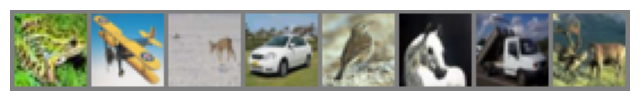

Label: frog plane deer car bird horse truck deer


In [ ]:
# Definisi transformasi data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Parameter batch size
batch_size = 128

# Memuat dataset CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Nama kelas CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Menampilkan informasi dataset
print(f"Jumlah data pelatihan: {len(trainset)}")
print(f"Jumlah data pengujian: {len(testset)}")
print(f"Jumlah kelas: {len(classes)}")
print(f"Kelas: {classes}")
print(f"Ukuran gambar: {trainset[0][0].shape}")

# Fungsi bantu untuk menampilkan gambar
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8,4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Ambil batch data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Tampilkan 8 gambar pertama
imshow(torchvision.utils.make_grid(images[:8]))
print('Label:', ' '.join(f'{classes[labels[j]]}' for j in range(8)))


## **MODEL CNN untuk CIFAR-10**

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)    # Output: 32x32x32
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)   # Output: 64x32x32
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Output: 128x32x32

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Setengahkan dimensi setiap kali

        # Batch normalization
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)

        # Dropout
        self.dropout = nn.Dropout(0.25)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)  # Output kelas CIFAR-10 = 10 kelas

    def forward(self, x):
        # Conv Block 1
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # → [32, 16, 16]
        # Conv Block 2
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # → [64, 8, 8]

        # Conv Block 3
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # → [128, 4, 4]

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Contoh inisialisasi model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn_model = CNN().to(device)
print(cnn_model)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


### **Train model**

In [ ]:
# Fungsi untuk melatih model
def train_model(model, trainloader, criterion, optimizer, num_epochs=10, scheduler=None):
    model.to(device)
    train_losses = []
    train_accs = []

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Reset gradien
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward + optimize
            loss.backward()
            optimizer.step()

            # Statistik
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Tampilkan progress setiap 100 batch
            if (i + 1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(trainloader)}], Loss: {loss.item():.4f}")

        # Rata-rata loss dan akurasi per epoch
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        # Step scheduler jika digunakan
        if scheduler:
            scheduler.step()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

    total_time = time.time() - start_time
    print(f"\n✅ Training selesai dalam {total_time:.2f} detik\n")

    return train_losses, train_accs


### **Evaluasi Model**

In [ ]:
# Fungsi untuk evaluasi model
def evaluate_model(model, testloader, classes):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0

    # Untuk tracking waktu
    start_time = time.time()

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            # Mengumpulkan prediksi dan label
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Membuat confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # ROC curve dan AUC (One-vs-Rest)
    # Perlu mengkonversi output ke format one-hot untuk ROC/AUC
    model.eval()
    probs = []
    with torch.no_grad():
        for data in testloader:
            images, _ = data
            images = images.to(device)
            output = model(images)
            probs.append(F.softmax(output, dim=1).cpu().numpy())

    probs = np.vstack(probs)

    # Menghitung ROC AUC untuk setiap kelas (one-vs-rest)
    n_classes = len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(all_labels) == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Menghitung rata-rata AUC
    macro_roc_auc = np.mean(list(roc_auc.values()))
    print(f'Macro ROC AUC: {macro_roc_auc:.4f}')

    # Print total evaluation time
    total_time = time.time() - start_time
    print(f'Evaluasi selesai dalam {total_time:.2f} detik')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': macro_roc_auc,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc_per_class': roc_auc
    }

### **Pelatihan Model CNN**

In [ ]:
print("Train Model CNN")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

cnn_train_losses, cnn_train_accs = train_model(cnn_model, trainloader, criterion, optimizer, num_epochs=50)
# Evaluasi model CNN di data test
print("\n🔍 Evaluasi Model CNN pada Data Testing")
cnn_eval_results = evaluate_model(cnn_model, testloader, classes)


Train Model CNN
Epoch [1/50], Step [100/391], Loss: 1.4982
Epoch [1/50], Step [200/391], Loss: 1.2543
Epoch [1/50], Step [300/391], Loss: 1.0938
Epoch 1/50, Loss: 1.2696, Accuracy: 53.80%
Epoch [2/50], Step [100/391], Loss: 1.0850
Epoch [2/50], Step [200/391], Loss: 0.8515
Epoch [2/50], Step [300/391], Loss: 0.9639
Epoch 2/50, Loss: 0.8801, Accuracy: 68.93%
Epoch [3/50], Step [100/391], Loss: 0.9090
Epoch [3/50], Step [200/391], Loss: 0.8814
Epoch [3/50], Step [300/391], Loss: 0.6871
Epoch 3/50, Loss: 0.7409, Accuracy: 73.80%
Epoch [4/50], Step [100/391], Loss: 0.6439
Epoch [4/50], Step [200/391], Loss: 0.6368
Epoch [4/50], Step [300/391], Loss: 0.5982
Epoch 4/50, Loss: 0.6495, Accuracy: 77.14%
Epoch [5/50], Step [100/391], Loss: 0.5021
Epoch [5/50], Step [200/391], Loss: 0.6745
Epoch [5/50], Step [300/391], Loss: 0.7572
Epoch 5/50, Loss: 0.5705, Accuracy: 80.01%
Epoch [6/50], Step [100/391], Loss: 0.4346
Epoch [6/50], Step [200/391], Loss: 0.6478
Epoch [6/50], Step [300/391], Loss: 0.

### **Evaluasi model CNN**


Evaluasi model CNN pada data test:
Accuracy: 0.7904
Precision: 0.7963
Recall: 0.7904
F1 Score: 0.7902
Macro ROC AUC: 0.9752
Evaluasi selesai dalam 5.08 detik


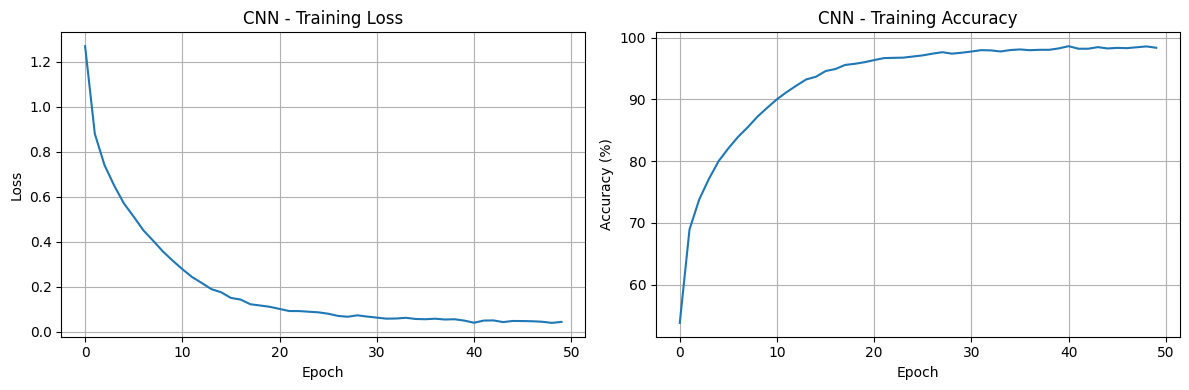

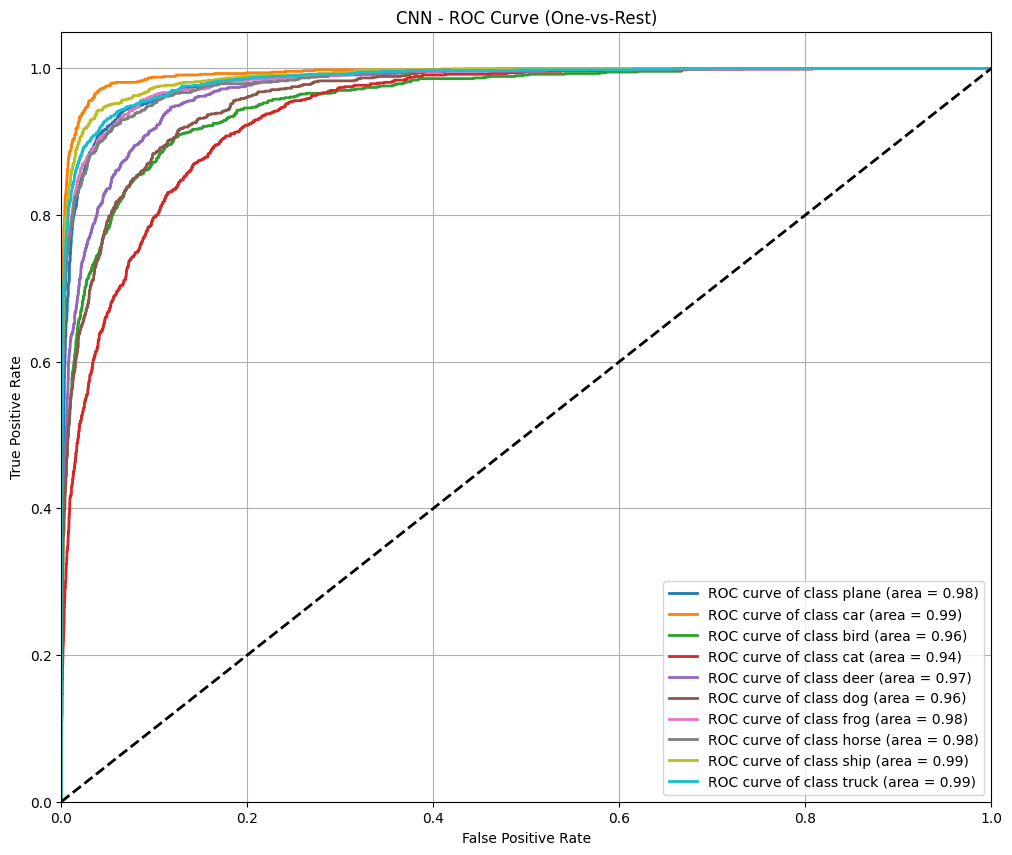


📊 Hasil Evaluasi CNN (Rata-rata):
accuracy: 0.7904
precision: 0.7963
recall: 0.7904
f1: 0.7902
roc_auc: 0.9752


In [ ]:
# Evaluasi model CNN
print("\nEvaluasi model CNN pada data test:")
cnn_metrics = evaluate_model(cnn_model, testloader, classes)

# Fungsi untuk plot hasil training
def plot_training_results(train_losses, train_accs, model_name):
    plt.figure(figsize=(12, 4))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses)
    plt.title(f'{model_name} - Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    # Plot training accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accs)
    plt.title(f'{model_name} - Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot hasil training CNN
plot_training_results(cnn_train_losses, cnn_train_accs, "CNN")

# Fungsi untuk plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, classes, model_name):
    plt.figure(figsize=(12, 10))

    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot ROC curve CNN
plot_roc_curve(cnn_metrics['fpr'], cnn_metrics['tpr'], cnn_metrics['roc_auc_per_class'], classes, "CNN")

# Tampilkan metrik rata-rata
print("\n📊 Hasil Evaluasi CNN (Rata-rata):")
for metric, value in cnn_metrics.items():
    if isinstance(value, float):
        print(f"{metric}: {value:.4f}")

### **Model MLP**

In [ ]:
# Model MLP (Vanilla) untuk CIFAR-10
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # CIFAR-10: 3x32x32 = 3072 input features
        self.fc1 = nn.Linear(3 * 32 * 32, 1024)  # Output: [batch_size, 1024]
        self.fc2 = nn.Linear(1024, 512)          # Output: [batch_size, 512]
        self.fc3 = nn.Linear(512, 10)            # Output: [batch_size, 10]
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Inisialisasi dan tampilkan model
mlp_model = MLP().to(device)
print(mlp_model)


MLP(
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


### **Pelatihan MLP**

In [ ]:
# Pelatihan model MLP
print("Training model MLP")
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)
mlp_train_losses, mlp_train_accs = train_model(mlp_model, trainloader, criterion, optimizer, num_epochs=50)

# Evaluasi model CNN di data test
print("\n🔍 Evaluasi Model CNN pada Data Testing")
mlp_eval_results = evaluate_model(mlp_model, testloader, classes)

Training model MLP
Epoch [1/50], Step [100/391], Loss: 1.9000
Epoch [1/50], Step [200/391], Loss: 1.6709
Epoch [1/50], Step [300/391], Loss: 1.5491
Epoch 1/50, Loss: 1.6939, Accuracy: 39.82%
Epoch [2/50], Step [100/391], Loss: 1.6595
Epoch [2/50], Step [200/391], Loss: 1.4524
Epoch [2/50], Step [300/391], Loss: 1.4703
Epoch 2/50, Loss: 1.5272, Accuracy: 46.04%
Epoch [3/50], Step [100/391], Loss: 1.3000
Epoch [3/50], Step [200/391], Loss: 1.3750
Epoch [3/50], Step [300/391], Loss: 1.6184
Epoch 3/50, Loss: 1.4480, Accuracy: 48.71%
Epoch [4/50], Step [100/391], Loss: 1.4144
Epoch [4/50], Step [200/391], Loss: 1.4180
Epoch [4/50], Step [300/391], Loss: 1.3241
Epoch 4/50, Loss: 1.3921, Accuracy: 50.68%
Epoch [5/50], Step [100/391], Loss: 1.3611
Epoch [5/50], Step [200/391], Loss: 1.4496
Epoch [5/50], Step [300/391], Loss: 1.3155
Epoch 5/50, Loss: 1.3377, Accuracy: 52.52%
Epoch [6/50], Step [100/391], Loss: 1.3535
Epoch [6/50], Step [200/391], Loss: 1.3572
Epoch [6/50], Step [300/391], Loss:


Evaluasi model MLP pada data test:
Accuracy: 0.5597
Precision: 0.5681
Recall: 0.5597
F1 Score: 0.5620
Macro ROC AUC: 0.8945
Evaluasi selesai dalam 5.53 detik


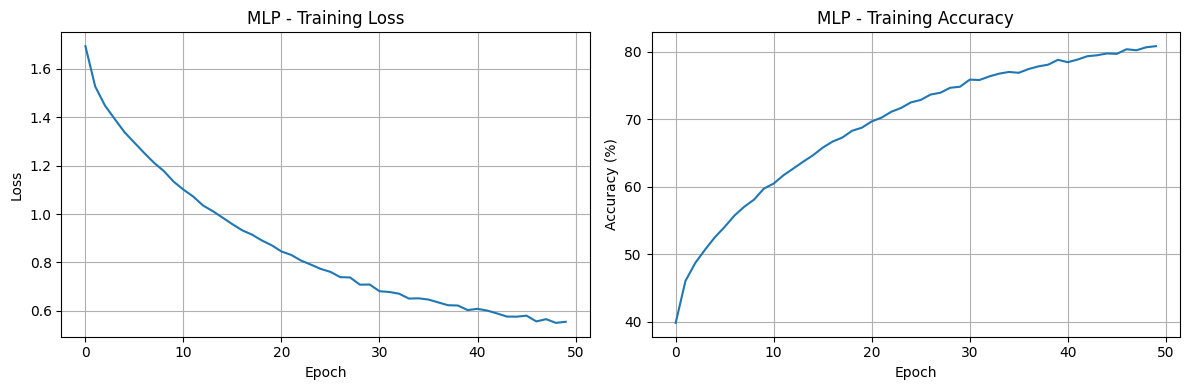

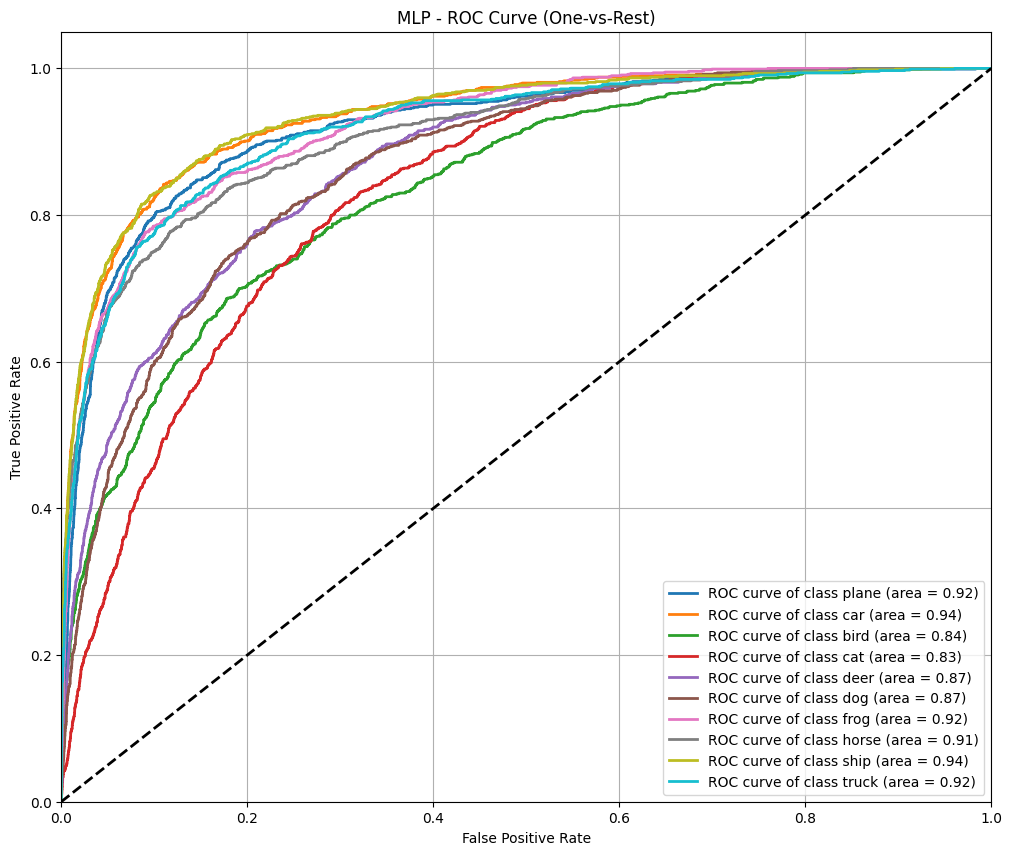


📊 Hasil Evaluasi MLP (Rata-rata):
accuracy: 0.5597
precision: 0.5681
recall: 0.5597
f1: 0.5620
roc_auc: 0.8945


In [ ]:
# 🔍 Evaluasi model MLP
print("\nEvaluasi model MLP pada data test:")
mlp_metrics = evaluate_model(mlp_model, testloader, classes)

# 📈 Plot hasil training MLP
plot_training_results(mlp_train_losses, mlp_train_accs, "MLP")

# 📉 Plot ROC curve untuk MLP
plot_roc_curve(mlp_metrics['fpr'], mlp_metrics['tpr'], mlp_metrics['roc_auc_per_class'], classes, "MLP")

# 📊 Tampilkan metrik rata-rata MLP
print("\n📊 Hasil Evaluasi MLP (Rata-rata):")
for metric, value in mlp_metrics.items():
    if isinstance(value, float):
        print(f"{metric}: {value:.4f}")


### Penjelasan perhitungan metrik di fungsi evaluate_model dan juga yang divisualisasikan:


###1. Accuracy
```python
accuracy = accuracy_score(all_labels, all_preds)
```
Rumus:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
Accuracy mengukur seberapa sering model memberikan prediksi yang benar dibandingkan dengan total prediksi.
- TP (True Positive): model benar memprediksi kelas positif  
- TN (True Negative): model benar memprediksi kelas negatif  
- FP (False Positive): model salah memprediksi kelas positif  
- FN (False Negative): model salah memprediksi kelas negatif  

###2. Precision (macro average)
```python
precision = precision_score(all_labels, all_preds, average='macro')
```
Rumus (untuk 1 kelas):
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Macro Average:
$$
\text{Macro Precision} = \frac{1}{N} \sum_{i=1}^N \frac{TP_i}{TP_i + FP_i}
$$
Precision mengukur seberapa banyak prediksi positif yang benar. Macro berarti kita ambil rata-rata dari semua kelas.

###3. Recall (macro average)
```python
recall = recall_score(all_labels, all_preds, average='macro')
```
Rumus (untuk 1 kelas):
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Macro average:
$$
\text{Macro Recall} = \frac{1}{N} \sum_{i=1}^N \frac{TP_i}{TP_i + FN_i}
$$
Recall mengukur seberapa banyak data aktual positif yang berhasil diprediksi benar oleh model.

---

###4. F1-Score (macro average)
**Kode:**
```python
f1 = f1_score(all_labels, all_preds, average='macro')
```

**Rumus (untuk 1 kelas):**
\[
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
\]

**Macro average:**
$$
\text{Macro F1} = \frac{1}{N} \sum_{i=1}^N F1_i
$$
F1 Score adalah harmoni antara precision dan recall, cocok kalau kamu pengen mempertimbangkan keduanya secara seimbang.

---

###5. ROC Curve dan AUC
**Kode:**
```python
fpr[i], tpr[i], _ = roc_curve(np.array(all_labels) == i, probs[:, i])
roc_auc[i] = auc(fpr[i], tpr[i])
```

**Rumus TPR dan FPR:**
$$
\text{TPR (Recall)} = \frac{TP}{TP + FN}
$$
$$
\text{FPR} = \frac{FP}{FP + TN}
$$

**Rumus AUC:**
AUC adalah luas di bawah kurva TPR vs FPR (ROC curve).
ROC (Receiver Operating Characteristic) Curve membandingkan TPR vs FPR di berbagai ambang threshold. AUC (Area Under Curve) menunjukkan seberapa baik model dalam membedakan antara kelas. Nilai AUC mendekati 1 artinya model sangat bagus.

---

###6. Loss Function (CrossEntropyLoss)
**Kode:**
```python
criterion = nn.CrossEntropyLoss()
```

**Rumus Cross Entropy untuk satu sample:**
$$
\mathcal{L} = -\sum_{c=1}^{C} y_c \cdot \log(p_c)
$$

- $\ y_c $ = 1 jika sample termasuk kelas \( c \), 0 lainnya (one-hot label)
- $\ p_c $ = probabilitas hasil softmax untuk kelas \( c \)
Cross entropy loss menghitung seberapa jauh distribusi prediksi model dengan distribusi label sebenarnya. Semakin kecil loss-nya, semakin baik model memprediksi.